In [4]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import IPython
import sklearn

w[0]: 0.393906  b: -0.031804


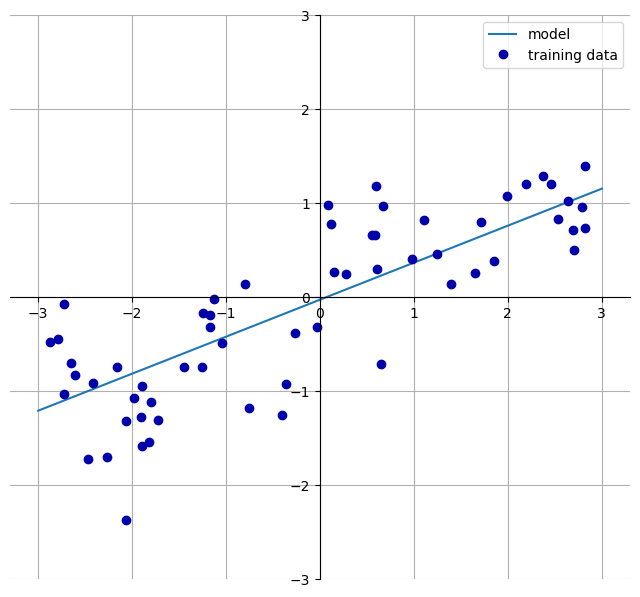

In [5]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression (aka ordinary least squares)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [16]:
# The weights also called coefficients(w) and the offset or intercept values(b) of the formula ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
print("lr.coef: {}".format(lr.coef_))
print("lr.intercept: {}".format(lr.intercept_))

lr.coef: [0.39390555]
lr.intercept: -0.031804343026759746


In [22]:
# the training set and test set performance

print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


The test and training scores are similar which results to underfitting

## Testing on the Boston Housing dataset

In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


## Ridge regression

In [49]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [53]:
# testing the alpha parameter which moves w coefficients closer to zero resultin in less performance but better generalizationabs
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [55]:
# For very small values of alpha, coefficients are barely restricted at all,
# and we end up with a model that resembles LinearRegression:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


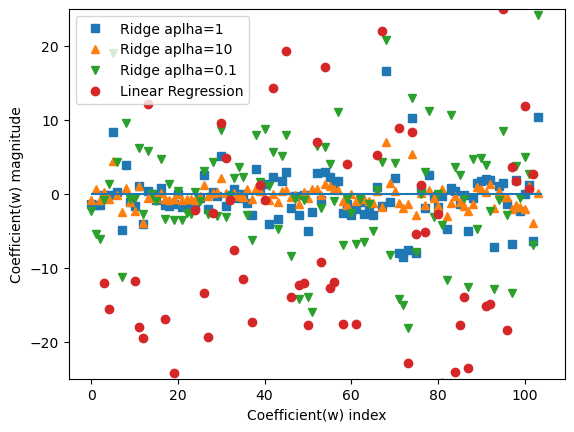

In [67]:
plt.plot(ridge.coef_, 's', label="Ridge aplha=1")
plt.plot(ridge10.coef_, '^', label="Ridge aplha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge aplha=0.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient(w) index")
plt.ylabel("Coefficient(w) magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()


learning curves of LinearRegression and Ridge(alpha=1) in Boston dataset

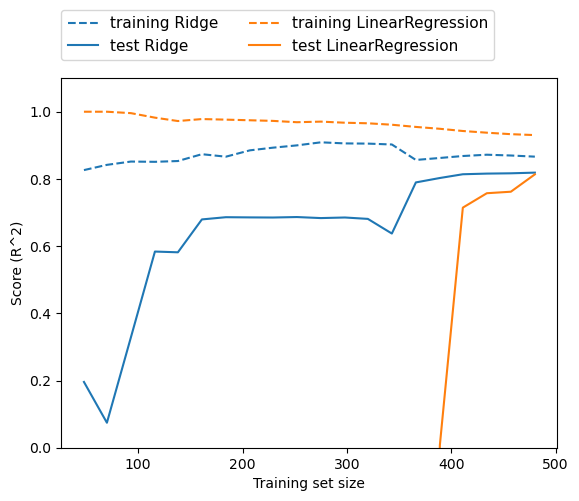

In [70]:
mglearn.plots.plot_ridge_n_samples()

The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and
linear regression will have the same performance 

## Lasso

In [74]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [76]:
# we increase the default setting of "max_iter"
# otherwise the model would warn us that we should increase max_iter

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [80]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
# this results in overfitting

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


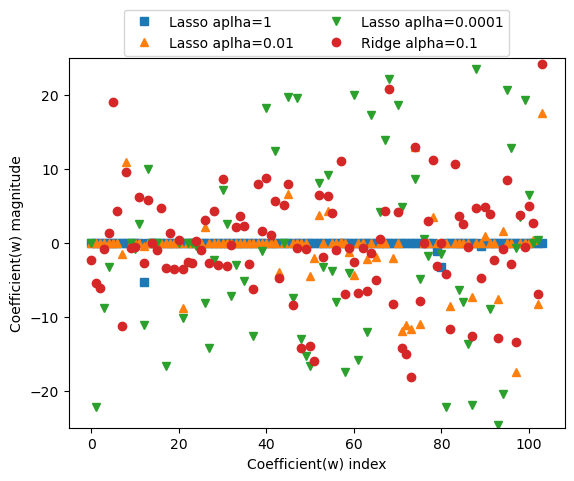

In [98]:
plt.plot(lasso.coef_, 's', label="Lasso aplha=1")
plt.plot(lasso001.coef_, '^', label="Lasso aplha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso aplha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.15), loc = "upper center")
plt.xlabel("Coefficient(w) index")
plt.ylabel("Coefficient(w) magnitude")
plt.ylim(-25,25)

plt.show()

If you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice.

## Linear models for classification

Applying the LogisticRegression and LinearSVC models to the forge dataset

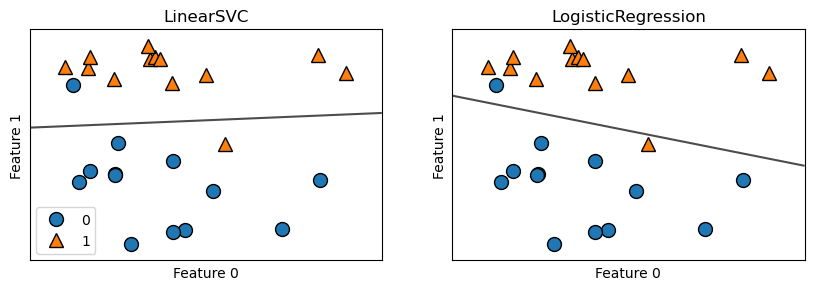

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip(
    [LinearSVC(dual=False, max_iter=5000), LogisticRegression(max_iter=5000)], axes):  
    clf = model.fit(X, y);
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In these algorithms there is a thrid trade-off parameter called C. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classi‐
fied correctly

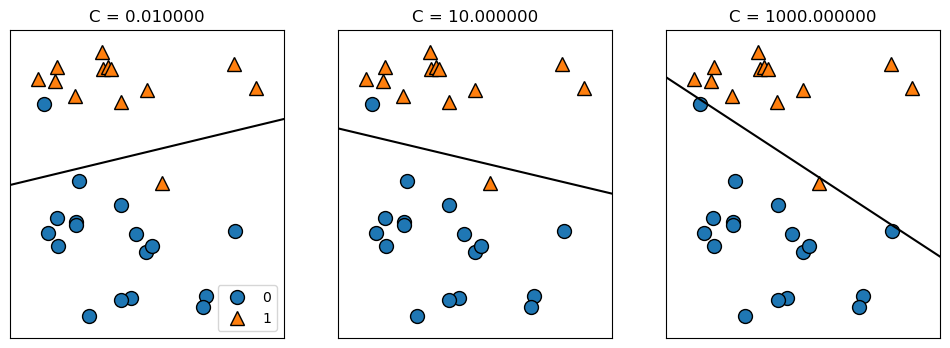

In [25]:
mglearn.plots.plot_linear_svc_regularization()

## Let’s analyze LogisticRegression in more detail on the Breast Cancer dataset:

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=4000).fit(X_train, y_train)
print("Training set score: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg.score(X_test, y_test)))
# This results likely in underfitting due to the similar score of the test and train set

Training set score: 0.95775
Test set score: 0.95804


In [60]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train,y_train)
print("Training set score: {:.5f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.98122
Test set score: 0.96503


In [76]:
logreg001 = LogisticRegression(max_iter=20000, C=0.01).fit(X_train,y_train)
print("Training set score: {:.5f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.95305
Test set score: 0.95105


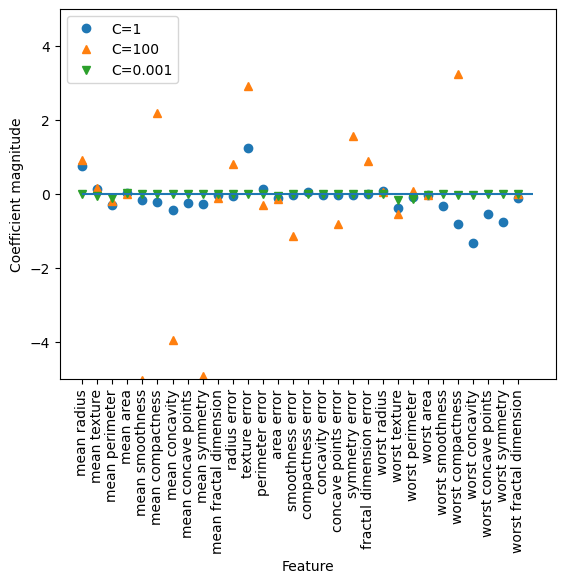

In [78]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l2 logreg with C=0.001: 0.95
Test accuracy of l2 logreg with C=0.001: 0.94
Training accuracy of l2 logreg with C=1.000: 0.96
Test accuracy of l2 logreg with C=1.000: 0.96
Training accuracy of l2 logreg with C=100.000: 0.98
Test accuracy of l2 logreg with C=100.000: 0.97


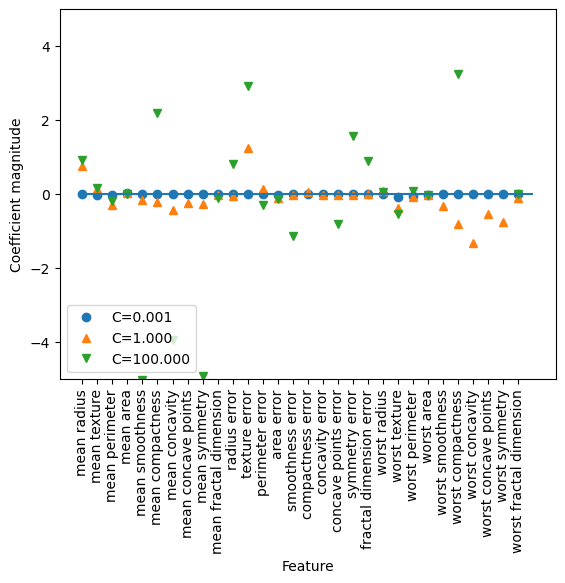

In [90]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(max_iter=10000 ,C=C, penalty="l2").fit(X_train, y_train)
    print("Training accuracy of l2 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l2 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear models for multiclass classification

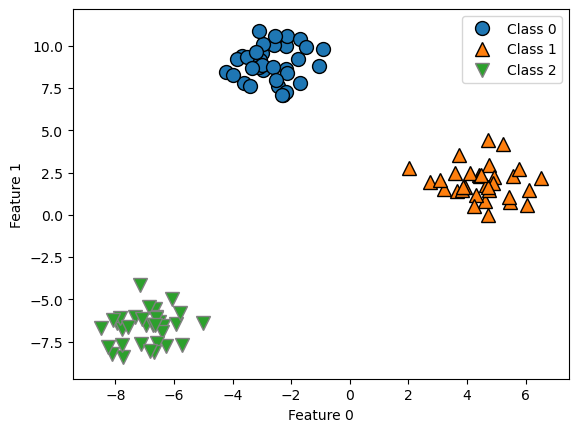

In [96]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [100]:
linear_svm = LinearSVC(dual="auto").fit(X, y)
print("Coefficient shape: ",linear_svm.coef_.shape)
print("Intercept shape: ",linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


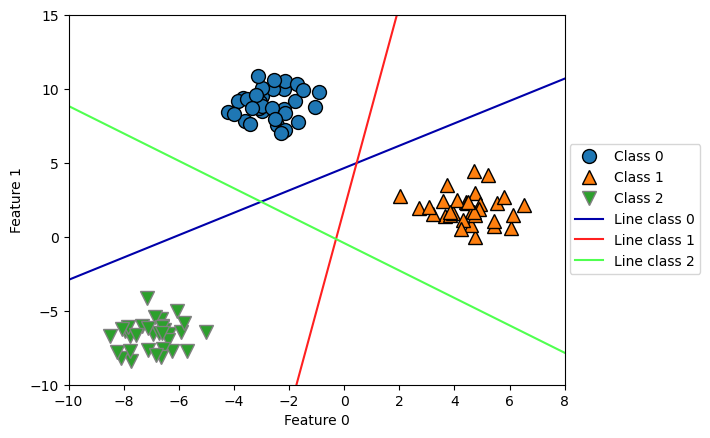

In [131]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

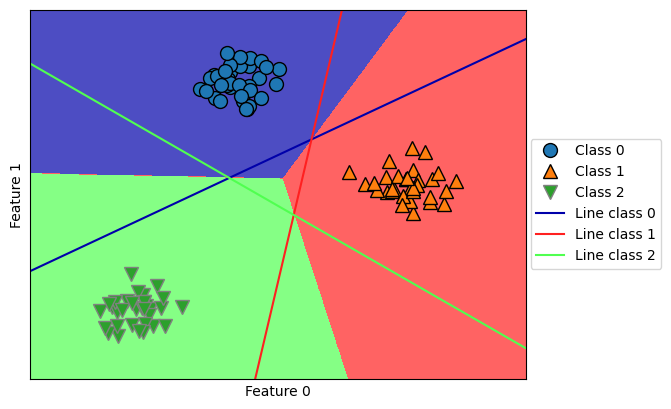

In [139]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
# The following example (Figure 2-21) shows the predictions for all regions of the 2D space